# Assignment 3

Import packages

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [ ]:
!python --version
print('TensorFlow ' + tf.__version__)

Python 3.7.13
TensorFlow 2.8.0


# Loading the dataset

In [ ]:
%cd C:\Users\patri\Documents\Dev\Deep_Learning_A3

C:\Users\patri\Documents\Dev\Deep_Learning_A3


In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!unzip -n /content/gdrive/Shareddrives/42028-Assignment-3/Dataset/title30cat.zip -d /content/dataset/

Archive:  /content/gdrive/Shareddrives/42028-Assignment-3/Dataset/title30cat.zip


In [ ]:
dataset_filepath = 'Dataset/'
label_names = ["ASIN", "FILENAME", "IMAGE_URL", "TITLE", "AUTHOR", "CATEGORY_ID", "CATEGORY"]

train_data = pd.read_csv(dataset_filepath + 'book30-listing-train.csv', names=label_names, engine='python', encoding='ISO-8859-1')
test_data = pd.read_csv(dataset_filepath + 'book30-listing-test.csv', names=label_names, engine='python', encoding='ISO-8859-1')


train_labels = pd.read_csv(dataset_filepath + 'bookcover30-labels-train.txt', sep=" ", names=['FILENAME', 'CLASS'], engine='python')
test_labels = pd.read_csv(dataset_filepath + 'bookcover30-labels-test.txt', sep=" ", names=['FILENAME', 'CLASS'], engine='python')


images_filepath = 'Dataset/'

NUM_CLASSES = 30

## Split test dataset into test and validation

In [ ]:
# Create Dictionary of Book Categories
def get_book_category_dict():
  test_data_sorted = test_data.sort_values('CATEGORY_ID')
  book_categories = dict(zip(test_data_sorted['CATEGORY_ID'], test_data_sorted['CATEGORY']))
  print(book_categories)
  return book_categories

book_categories = get_book_category_dict()

# Convert CLASS values into class names
train_labels['CLASS'] = train_labels['CLASS'].map(book_categories)
test_labels['CLASS'] = test_labels['CLASS'].map(book_categories)

{0: 'Arts & Photography', 1: 'Biographies & Memoirs', 2: 'Business & Money', 3: 'Calendars', 4: "Children's Books", 5: 'Comics & Graphic Novels', 6: 'Computers & Technology', 7: 'Cookbooks, Food & Wine', 8: 'Crafts, Hobbies & Home', 9: 'Christian Books & Bibles', 10: 'Engineering & Transportation', 11: 'Health, Fitness & Dieting', 12: 'History', 13: 'Humor & Entertainment', 14: 'Law', 15: 'Literature & Fiction', 16: 'Medical Books', 17: 'Mystery, Thriller & Suspense', 18: 'Parenting & Relationships', 19: 'Politics & Social Sciences', 20: 'Reference', 21: 'Religion & Spirituality', 22: 'Romance', 23: 'Science & Math', 24: 'Science Fiction & Fantasy', 25: 'Self-Help', 26: 'Sports & Outdoors', 27: 'Teen & Young Adult', 28: 'Test Preparation', 29: 'Travel'}


In [ ]:
from sklearn.model_selection import train_test_split

test_labels_original = test_labels
test_data_original = test_data

test_data, validation_data, test_labels, validation_labels = train_test_split(test_data, test_labels, test_size=0.5, random_state=42, stratify=test_labels['CLASS'])


## Create ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

#train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        train_labels,
        directory=images_filepath + '224x224/',  # This is the source directory for training images
        x_col='FILENAME',
        y_col='CLASS',
        target_size=(224, 224),  # All images will be resized
        batch_size=32,
        class_mode='categorical')
        

Found 51300 validated image filenames belonging to 30 classes.


In [ ]:
validation_generator = train_datagen.flow_from_dataframe(
        validation_labels,
        directory=images_filepath + '224x224/',  # This is the source directory for training images
        x_col='FILENAME',
        y_col='CLASS',
        target_size=(224, 224),  # All images will be resized
        batch_size=32,
        class_mode='categorical')

Found 2850 validated image filenames belonging to 30 classes.


In [ ]:
# for test data

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

#test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
        test_labels,
        directory=images_filepath + '224x224/',  # This is the source directory for training images
        x_col='FILENAME',
        y_col='CLASS',
        target_size=(224, 224),  # All images will be resized
        batch_size=32,
        class_mode='categorical')
        

Found 2850 validated image filenames belonging to 30 classes.


## Display sample images from ImageDataGenerator

In [ ]:
# Create Dictionary of Book Categories
#book_categories = test_data.drop_duplicates(subset=['CATEGORY']).groupby('CATEGORY_ID')['CATEGORY'].apply(list).to_dict()
#print(book_categories)

#Method to get dict key using value
def get_key(val):
    for key, value in book_categories.items():
         if val == key:
             return value
 
    return "key doesn't exist"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

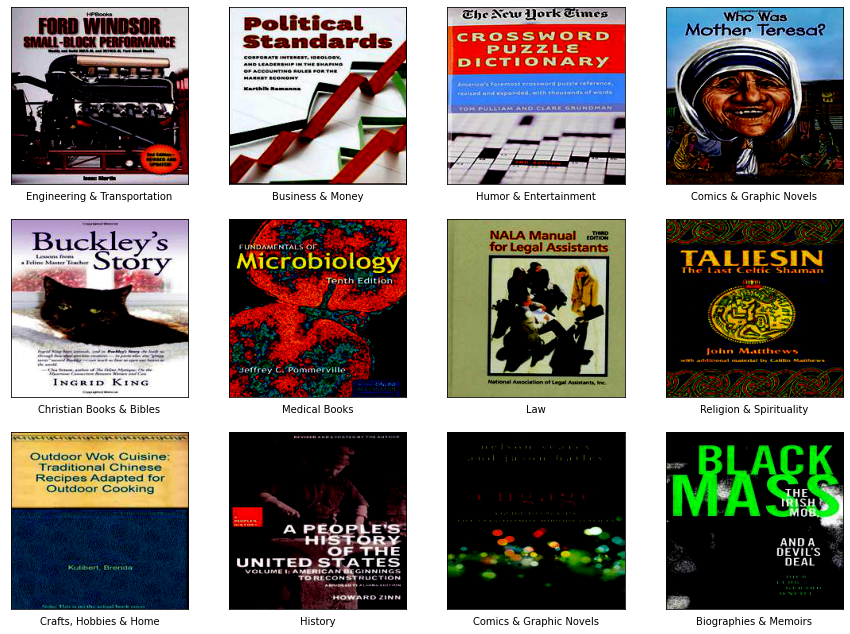

In [ ]:
# Check that it appears to be correct

from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

x,y = train_generator.next()

plt.figure(figsize=(15,15))
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    plt.xlabel(get_key(np.where(y[i] == 1)[0]))


## Display sample data

In [ ]:
train_data.head()

,ASIN,FILENAME,IMAGE_URL,TITLE,AUTHOR,CATEGORY_ID,CATEGORY
0,1588345297,1588345297.jpg,http://ecx.images-amazon.com/images/I/51l6XIoa...,With Schwarzkopf: Life Lessons of The Bear,Gus Lee,1,Biographies & Memoirs
1,1404803335,1404803335.jpg,http://ecx.images-amazon.com/images/I/51UJnL3T...,"Magnets: Pulling Together, Pushing Apart (Amaz...",Natalie M. Rosinsky,4,Children's Books
2,1446276082,1446276082.jpg,http://ecx.images-amazon.com/images/I/51MGUKhk...,Energy Security (SAGE Library of International...,NaN,10,Engineering & Transportation
3,1491522666,1491522666.jpg,http://ecx.images-amazon.com/images/I/51qKvjsi...,An Amish Gathering: Life in Lancaster County,Beth Wiseman,9,Christian Books & Bibles
4,970096410,0970096410.jpg,http://ecx.images-amazon.com/images/I/51qoUENb...,City of Rocks Idaho: A Climber's Guide (Region...,Dave Bingham,26,Sports & Outdoors


In [ ]:
validation_data.head()

,ASIN,FILENAME,IMAGE_URL,TITLE,AUTHOR,CATEGORY_ID,CATEGORY
3148,1570615225,1570615225.jpg,http://ecx.images-amazon.com/images/I/510uvXE3...,"Sources of the River, 2nd Edition: Tracking Da...",Jack Nisbet,1,Biographies & Memoirs
598,321998596,0321998596.jpg,http://ecx.images-amazon.com/images/I/519NP92Y...,Algebra and Trigonometry (10th Edition),Michael Sullivan,23,Science & Math
4210,1451612591,1451612591.jpg,http://ecx.images-amazon.com/images/I/41WG%2B0...,How to Win Friends and Influence People in the...,Dale Carnegie & Associates,25,Self-Help
2250,756644798,0756644798.jpg,http://ecx.images-amazon.com/images/I/51F2qG4m...,Level 2 Reader: Meet Ash (hc) (Pokemon (DK Pub...,BradyGames,6,Computers & Technology
3277,124695426,0124695426.jpg,http://ecx.images-amazon.com/images/I/41RoOAGD...,"The Alkaloids: Chemistry and Pharmacology, Vol...",NaN,23,Science & Math


In [ ]:
test_data.head()

,ASIN,FILENAME,IMAGE_URL,TITLE,AUTHOR,CATEGORY_ID,CATEGORY
1223,78775140,0078775140.jpg,http://ecx.images-amazon.com/images/I/51ZNbQLk...,"The American Vision: Modern Times, Student Edi...",McGraw-Hill Education,27,Teen & Young Adult
1114,739729152,0739729152.jpg,http://ecx.images-amazon.com/images/I/51rmDI%2...,St. Kitts And Nevis Foreign Policy And Governm...,Ibp Usa,29,Travel
3785,911797718,0911797718.jpg,http://ecx.images-amazon.com/images/I/41woL1qQ...,When Nature Heals: The Greening of Rocky Mount...,Wendy Shattil,26,Sports & Outdoors
1300,1563831953,1563831953.jpg,http://ecx.images-amazon.com/images/I/51me-Cv-...,The Ultimate RV Cookbook,G&R Publishing,7,"Cookbooks, Food & Wine"
1018,1742371906,1742371906.jpg,http://ecx.images-amazon.com/images/I/51rHX3xx...,Seeing the Sunrise,Justin Langer,26,Sports & Outdoors


In [ ]:
train_labels.head()

,FILENAME,CLASS
0,1588345297.jpg,Biographies & Memoirs
1,1404803335.jpg,Children's Books
2,1446276082.jpg,Engineering & Transportation
3,1491522666.jpg,Christian Books & Bibles
4,0970096410.jpg,Sports & Outdoors


In [ ]:
validation_labels.head()

,FILENAME,CLASS
3148,1570615225.jpg,Biographies & Memoirs
598,0321998596.jpg,Science & Math
4210,1451612591.jpg,Self-Help
2250,0756644798.jpg,Computers & Technology
3277,0124695426.jpg,Science & Math


In [ ]:
test_labels.head()

,FILENAME,CLASS
1223,0078775140.jpg,Teen & Young Adult
1114,0739729152.jpg,Travel
3785,0911797718.jpg,Sports & Outdoors
1300,1563831953.jpg,"Cookbooks, Food & Wine"
1018,1742371906.jpg,Sports & Outdoors


## View class distribution

In [ ]:
# View class distribution
train_labels.groupby(['CLASS']).size().reset_index(name='Count')

,CLASS,Count
0,Arts & Photography,1710
1,Biographies & Memoirs,1710
2,Business & Money,1710
3,Calendars,1710
4,Children's Books,1710
5,Christian Books & Bibles,1710
6,Comics & Graphic Novels,1710
7,Computers & Technology,1710
8,"Cookbooks, Food & Wine",1710
9,"Crafts, Hobbies & Home",1710


In [ ]:
validation_labels.groupby(['CLASS']).size().reset_index(name='Count')

,CLASS,Count
0,Arts & Photography,95
1,Biographies & Memoirs,95
2,Business & Money,95
3,Calendars,95
4,Children's Books,95
5,Christian Books & Bibles,95
6,Comics & Graphic Novels,95
7,Computers & Technology,95
8,"Cookbooks, Food & Wine",95
9,"Crafts, Hobbies & Home",95


In [ ]:
test_labels.groupby(['CLASS']).size().reset_index(name='Count')

,CLASS,Count
0,Arts & Photography,95
1,Biographies & Memoirs,95
2,Business & Money,95
3,Calendars,95
4,Children's Books,95
5,Christian Books & Bibles,95
6,Comics & Graphic Novels,95
7,Computers & Technology,95
8,"Cookbooks, Food & Wine",95
9,"Crafts, Hobbies & Home",95


# InceptionResNetV2

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inceptionresnet_base = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling=None,
    classes=30,
    classifier_activation="softmax",
)

inceptionresnet_base.summary()

inceptionresnet_model = models.Sequential()
inceptionresnet_model.add(inceptionresnet_base)
inceptionresnet_model.add(layers.Flatten())
inceptionresnet_model.add(layers.Dense(512, activation='relu'))
inceptionresnet_model.add(layers.Dense(512, activation='relu'))
inceptionresnet_model.add(layers.Dense(512, activation='relu'))
inceptionresnet_model.add(layers.Dense(512, activation='relu'))
inceptionresnet_model.add(layers.Dense(512, activation='relu'))
inceptionresnet_model.add(layers.Dense(30, activation='softmax'))  # output layer

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                               

Retrain from saved model (uncomment and run if needed)

In [ ]:
from tensorflow.keras.models import load_model

## Copy the name of the last saved model
#inceptionresnet_model = load_model('D:/Patrick/Documents/Dev/Deep_Learning_A3/Checkpoint-InceptionResnet/weights.08-3.11.hdf5')  # <===== Change model filename

Compile model

In [ ]:
inceptionresnet_model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc', tf.keras.metrics.TopKCategoricalAccuracy(k=5)])
inceptionresnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 512)               19661312  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                        

Checkpointing

In [ ]:
# checkpointing
#checkpoint = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=1, period=3)

checkpoint_filepath = 'D:/Patrick/Documents/Dev/Deep_Learning_A3/Checkpoint-InceptionResnet/weights.{epoch:02d}-{loss:.2f}.hdf5'
inceptionresnet_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)


Early stopping criteria

In [ ]:
#my_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Tensorboard

```
tensorboard --logdir=D:\Patrick\Documents\Dev\Deep_Learning_A3\logs\fit-InceptionResnet\
```



In [ ]:
log_dir = "D:/Patrick/Documents/Dev/Deep_Learning_A3/logs/fit-InceptionResnet/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#log_dir = "D:/Patrick/Documents/Dev/Deep_Learning_A3/logs/fit-InceptionResnet/20220528-000626"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


## Train the model

In [ ]:
# Train the model
inceptionresnet_history = inceptionresnet_model.fit(
      train_generator,
      steps_per_epoch=400,  
      epochs=100,
      verbose=1,
      validation_data=validation_generator,
      validation_steps=80,
      callbacks = [inceptionresnet_checkpoint, tensorboard_callback]
      #initial_epoch=8  # <===== change if resuming from checkpoint
)

Epoch 1/100
400/400 [==============================] - 441s 1s/step - loss: 3.2982 - acc: 0.0583 - top_k_categorical_accuracy: 0.2704 - val_loss: 3.7777 - val_acc: 0.0574 - val_top_k_categorical_accuracy: 0.2480
Epoch 2/100
400/400 [==============================] - 433s 1s/step - loss: 3.2659 - acc: 0.0702 - top_k_categorical_accuracy: 0.2918 - val_loss: 3.2158 - val_acc: 0.0848 - val_top_k_categorical_accuracy: 0.3238
Epoch 3/100
400/400 [==============================] - 413s 1s/step - loss: 3.2208 - acc: 0.0820 - top_k_categorical_accuracy: 0.3252 - val_loss: 3.3989 - val_acc: 0.0742 - val_top_k_categorical_accuracy: 0.3105
Epoch 4/100
400/400 [==============================] - 417s 1s/step - loss: 3.2016 - acc: 0.0897 - top_k_categorical_accuracy: 0.3403 - val_loss: 13.7467 - val_acc: 0.0375 - val_top_k_categorical_accuracy: 0.1789
Epoch 5/100
400/400 [==============================] - 417s 1s/step - loss: 3.1390 - acc: 0.0973 - top_k_categorical_accuracy: 0.3663 - val_loss: 3.453

Plot curves to determine overfitting, etc.

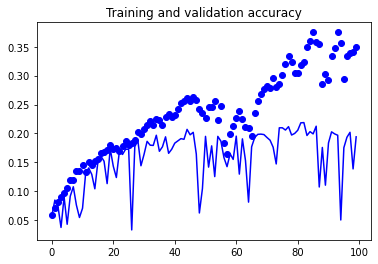

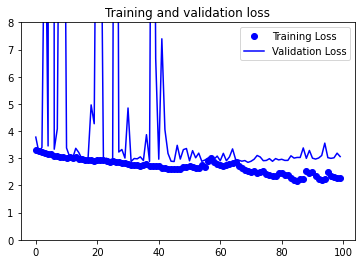

In [ ]:
import matplotlib.pyplot as plt

history = inceptionresnet_history

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.ylim(top=8, bottom=0)

plt.show()

## Evaluate model on test dataset

In [ ]:
inceptionresnet_test_loss = inceptionresnet_model.evaluate(test_generator)

90/90 [==============================] - 27s 290ms/step - loss: 3.1476 - acc: 0.1926 - top_k_categorical_accuracy: 0.4751


In [ ]:
# Save fully trained model
inceptionresnet_model.save('SavedModels/inceptionresnet-genremodel-v2-20220528.h5')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

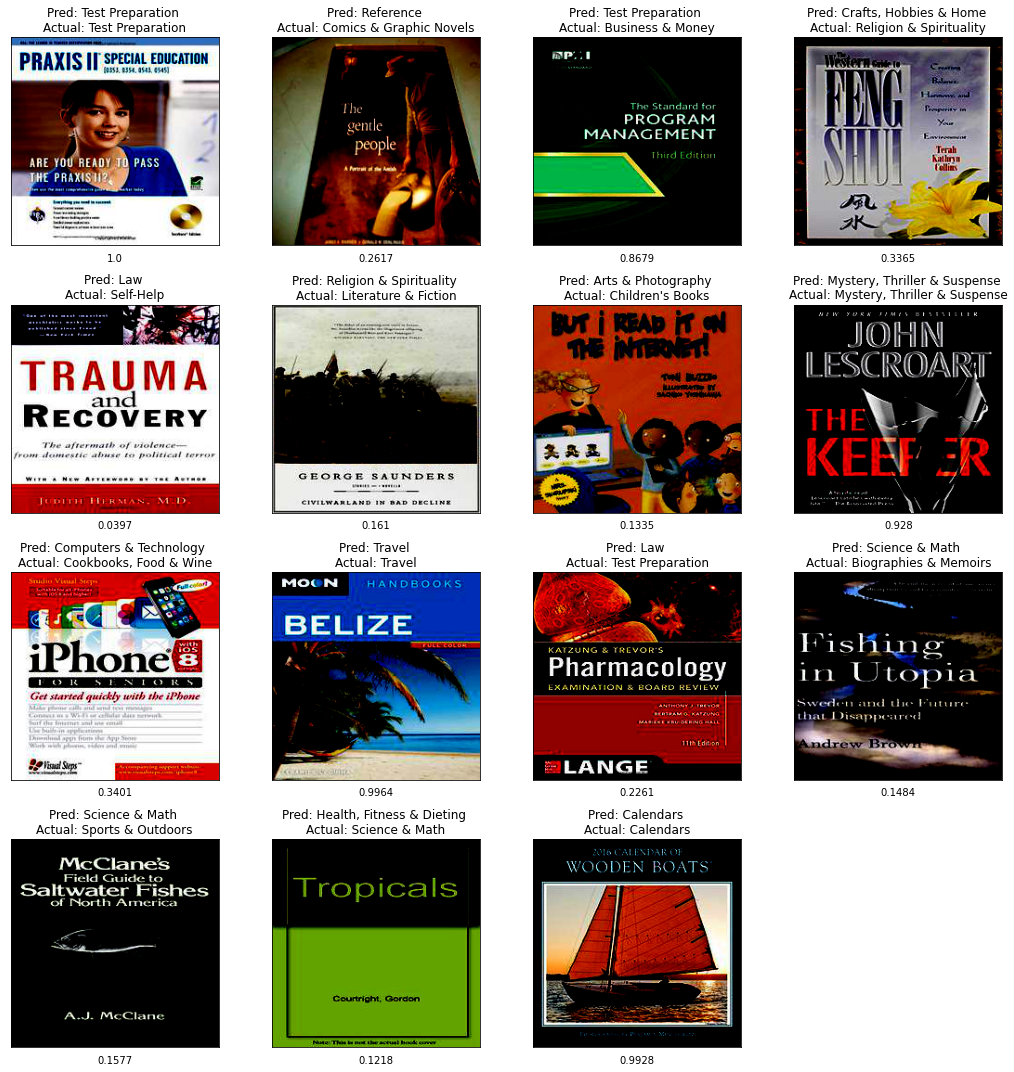

In [ ]:
x,y = test_generator.next()

preds = inceptionresnet_model.predict(x)
preds_names = np.argmax(preds, axis=1)
prob = np.max(preds, axis=1)
prob = prob.round(4)
classes = test_generator.class_indices
classes = dict((v,k) for k,v in classes.items())

plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Pred: {classes[preds_names[i]]} \nActual: {get_key(np.where(y[i] == 1)[0])}')
    plt.xlabel(prob[i])
    plt.imshow(x[i])
    plt.tight_layout()

Confusion matrix

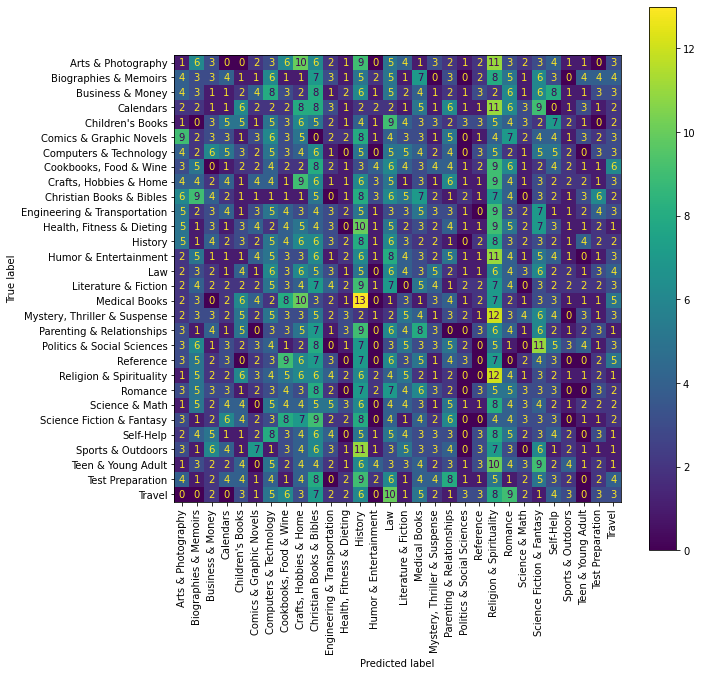

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

class_names = list(book_categories.values())

predictions = inceptionresnet_model.predict(test_generator)
predictions = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_generator.classes, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
c_report = classification_report(test_generator.classes, 
                                 predictions, 
                                 target_names=class_names)
print(c_report)

                              precision    recall  f1-score   support

          Arts & Photography       0.03      0.03      0.03        95
       Biographies & Memoirs       0.04      0.04      0.04        95
            Business & Money       0.04      0.03      0.03        95
                   Calendars       0.01      0.01      0.01        95
            Children's Books       0.04      0.03      0.03        95
     Comics & Graphic Novels       0.04      0.03      0.04        95
      Computers & Technology       0.05      0.06      0.05        95
      Cookbooks, Food & Wine       0.01      0.01      0.01        95
      Crafts, Hobbies & Home       0.06      0.08      0.07        95
    Christian Books & Bibles       0.05      0.09      0.07        95
Engineering & Transportation       0.06      0.04      0.05        95
   Health, Fitness & Dieting       0.10      0.04      0.06        95
                     History       0.04      0.08      0.05        95
       Humor & Ente